In [7]:
%matplotlib inline
from pandas.io.sql import read_sql
import matplotlib.pyplot as plt
from pyiem.util import get_dbconn
pgconn = get_dbconn('postgis')
cursor = pgconn.cursor()
df = read_sql("""
 with bz as (
     select w.wfo, w.ugc, geom, issue, expire from warnings w JOIN ugcs u on (w.gid = u.gid)
     where phenomena = 'BZ' and significance = 'W'),
 svto as (
     SELECT phenomena, wfo, geom, issue, expire, eventid from sbw where 
     phenomena in ('TO','SV')  and significance = 'W' and issue > '2005-10-01'
     and status = 'NEW')

 SELECT bz.ugc, bz.issue as bzissue, bz.expire as bzexpire,
 svto.issue as wissue, svto.expire as wexpire, svto.phenomena as wtype, svto.eventid as weventid,
 bz.wfo
 from bz, svto WHERE 
 svto.wfo = bz.wfo and ST_Intersects(bz.geom, svto.geom) and svto.expire > bz.issue and 
 svto.issue < bz.expire ORDER by bz.issue ASC
""", pgconn, index_col=None)


In [8]:
df

,ugc,bzissue,bzexpire,wissue,wexpire,wtype,weventid,wfo
0,MTZ037,2006-04-18 17:47:00-05:00,2006-04-19 21:30:00-05:00,2006-04-17 17:31:00-05:00,2006-05-19 18:03:00-05:00,SV,1,BYZ
1,NEZ019,2008-05-02 09:26:00-05:00,2008-05-02 19:20:00-05:00,2008-04-24 14:30:00-05:00,2008-05-07 17:38:00-05:00,SV,10,CYS
2,NEZ005,2009-03-23 13:00:00-05:00,2009-03-24 13:23:00-05:00,2009-03-23 13:37:00-05:00,2009-03-23 14:15:00-05:00,SV,1,LBF
3,NEZ005,2009-03-23 13:00:00-05:00,2009-03-24 13:23:00-05:00,2009-03-23 14:21:00-05:00,2009-03-23 15:00:00-05:00,SV,3,LBF
4,NEZ005,2009-03-23 13:00:00-05:00,2009-03-24 13:23:00-05:00,2009-03-23 13:53:00-05:00,2009-03-23 14:32:00-05:00,TO,1,LBF
5,NEZ094,2009-03-23 13:00:00-05:00,2009-03-24 13:23:00-05:00,2009-03-23 13:53:00-05:00,2009-03-23 14:32:00-05:00,TO,1,LBF
6,NEZ094,2009-03-23 13:00:00-05:00,2009-03-24 13:23:00-05:00,2009-03-23 13:37:00-05:00,2009-03-23 14:15:00-05:00,SV,1,LBF
7,OKZ007,2009-03-27 07:00:00-05:00,2009-03-28 13:00:00-05:00,2009-03-27 09:09:00-05:00,2009-03-27 09:45:00-05:00,SV,69,OUN
8,OKZ012,2009-03-27 07:00:00-05:00,2009-03-28 13:00:00-05:00,2009-03-27 09:09:00-05:00,2009-03-27 09:45:00-05:00,SV,69,OUN
9,AZZ033,2010-01-22 00:00:00-06:00,2010-01-22 12:00:00-06:00,2010-01-21 23:33:00-06:00,2010-01-22 00:30:00-06:00,SV,4,TWC


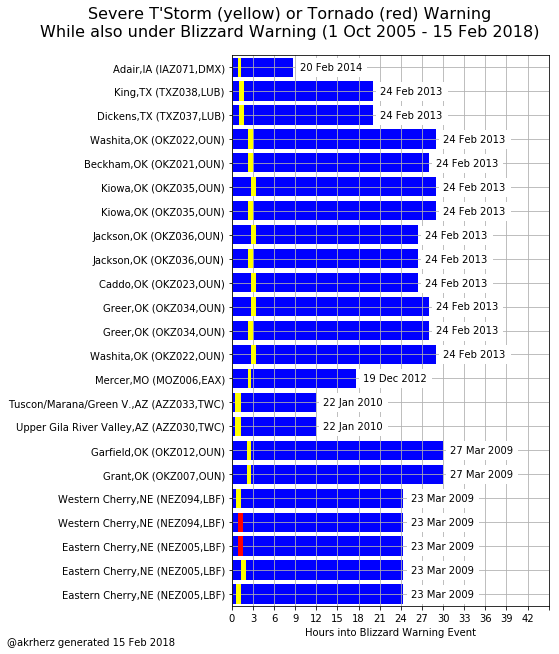

In [11]:

(fig, ax) = plt.subplots(1, 1, figsize=(8, 9))
ylabels = []
yticks = []
j = 0
colors = {'SV':'yellow', 'TO':'red'}
for i, row in df.iterrows():
    sz = (df['bzexpire'][i] - df['bzissue'][i]).days * 86400. + (df['bzexpire'][i] - df['bzissue'][i]).seconds
    offset2 = (df['wissue'][i] - df['bzissue'][i]).days * 86400. + (df['wissue'][i] - df['bzissue'][i]).seconds
    if offset2 < 0:
        continue
    ax.barh(j, sz, color='b', zorder=1)
    ax.text(sz+3600, j, "%s" % (df['wexpire'][i].strftime("%-d %b %Y"),), va='center',
            bbox=dict(color='white'))
    cursor.execute("""SELECT name ||','||state from ugcs where ugc = %s LIMIT 1""", (df['ugc'][i],))
    name = cursor.fetchone()[0]
    if row['ugc'] == 'AZZ033':
        name = "Tuscon/Marana/Green V.,AZ"
    ylabels.append("%s (%s,%s)" % (name, row['ugc'], row['wfo']))
    sz = (df['wexpire'][i] - df['wissue'][i]).days * 86400. + (df['wexpire'][i] - df['wissue'][i]).seconds
    #print row, sz, offset2
    ax.barh(j, sz, left=offset2, facecolor=colors[df['wtype'][i]], zorder=2)
    yticks.append(j)
    j += 1
    
b = ax.set_yticklabels(ylabels)
a = ax.set_yticks(yticks)
ax.set_position([0.4, 0.07, 0.55, 0.85])
ax.set_ylim(-0.5,len(ylabels)-0.5)
ax.set_xticks( range(0,10800*15+1,10800))
ax.set_xticklabels( range(0,43,3) )
ax.grid(True)
ax.set_xlabel("Hours into Blizzard Warning Event")
fig.text(0.5, 0.95, ("Severe T'Storm (yellow) or Tornado (red) Warning\n"
                     "While also under Blizzard Warning (1 Oct 2005 - 15 Feb 2018)"),
         fontsize=16, ha='center')
fig.text(0.01, 0.01, "@akrherz generated 15 Feb 2018")
fig.savefig('test.png')